In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [2]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [3]:
X, y = data[:, 1:], data[:, :1]

In [4]:
y_oe = (y % 2)

In [5]:
y.shape

(19999, 1)

In [6]:
ohe = OneHotEncoder()

In [7]:
y_hot = ohe.fit_transform(y).todense()

In [8]:
y_oe_hot = ohe.fit_transform(y_oe).todense()

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [51]:
input_layer = Input(shape=(784,))
d1 = Dense(units=400, activation="sigmoid", name="d1")(input_layer)
d2 = Dense(units=200, activation="sigmoid", name="d2")(d1)
d3 = Dense(units=100, activation="sigmoid", name="d3")(d2)
d41 = Dense(units=50, activation="sigmoid", name="d41")(d3)
d42 = Dense(units=50, activation="sigmoid", name="d42")(d3)
out1 = Dense(units=10, activation="softmax", name="out1")(d41)
out2 = Dense(units=2, activation="sigmoid", name="out2")(d42)

model = Model(inputs=[input_layer], outputs=[out1, out2])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
d1 (Dense)                      (None, 400)          314000      input_6[0][0]                    
__________________________________________________________________________________________________
d2 (Dense)                      (None, 200)          80200       d1[0][0]                         
__________________________________________________________________________________________________
d3 (Dense)                      (None, 100)          20100       d2[0][0]                         
____________________________________________________________________________________________

In [52]:
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"])

In [53]:
history = model.fit(x=[X[:10000]],
    y=[y_hot[:10000], y_oe_hot[:10000]],
    batch_size=100,
    epochs=10,
    )

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 4s 443us/sample - loss: 2.3964 - out1_loss: 1.9262 - out2_loss: 0.4702 - out1_accuracy: 0.4265 - out2_accuracy: 0.7712
Epoch 2/10
10000/10000 [==============================] - 3s 283us/sample - loss: 1.2909 - out1_loss: 1.0822 - out2_loss: 0.2087 - out1_accuracy: 0.7211 - out2_accuracy: 0.9257
Epoch 3/10
10000/10000 [==============================] - 3s 264us/sample - loss: 0.9382 - out1_loss: 0.7617 - out2_loss: 0.1765 - out1_accuracy: 0.8014 - out2_accuracy: 0.9392
Epoch 4/10
10000/10000 [==============================] - 3s 254us/sample - loss: 0.7589 - out1_loss: 0.5944 - out2_loss: 0.1645 - out1_accuracy: 0.8484 - out2_accuracy: 0.9422
Epoch 5/10
10000/10000 [==============================] - 3s 267us/sample - loss: 0.6498 - out1_loss: 0.4940 - out2_loss: 0.1558 - out1_accuracy: 0.8688 - out2_accuracy: 0.9443
Epoch 6/10
10000/10000 [==============================] - 3s 349us/sample - loss: 0.5755 - o

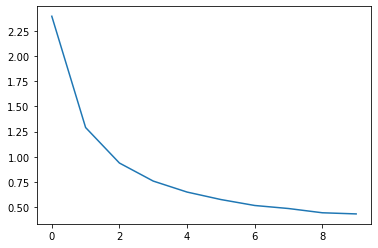

In [57]:
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(history.history['loss'])
plt.subplot(3, 2, 3)
plt.plot(history.history['out1_loss'])
plt.subplot(3, 2, 4)
plt.plot(history.history['out2_loss'])
plt.subplot(3, 2, 5)
plt.plot(history.history['out1_accuracy'])
plt.subplot(3, 2, 6)
plt.plot(history.history['loss'])
plt.show()

In [54]:
model.evaluate(x=[X[10000:]],
    y=[y_hot[10000:], y_oe_hot[10000:]],
    batch_size=2000,
    verbose=0)

[0.4643131565458716, 0.33280382, 0.13151084, 0.9022902, 0.95329535]

In [21]:
result1, result2 = model.predict(X[:5])

In [28]:
result2

array([[0.00237373, 0.5720421 ],
       [0.00739008, 0.32655677],
       [0.00778916, 0.29852447],
       [0.00346583, 0.47299814],
       [0.5718068 , 0.00530264]], dtype=float32)

In [26]:
result1.argmax(axis=1)

array([5, 7, 9, 5, 2])

In [23]:
result2.argmax(axis=1)

array([1, 1, 1, 1, 0])

In [24]:
y[:5]

array([[5],
       [7],
       [9],
       [5],
       [2]], dtype=uint8)

Text(0.5, 1.0, '[[4 9 1 8 5 0 6 7 3 2]][[1 0]]')

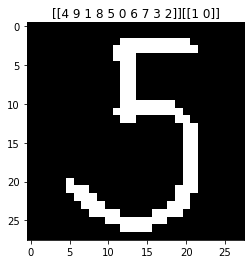

In [44]:
from PIL import Image
im = Image.open("../datasets/nums/five.jpeg")
im = im.resize((28, 28))
img = np.array(im)
img_gray = (255 - img.mean(axis=2))
fin_img = (img_gray > 130).astype(int) * 255

plt.imshow(fin_img, cmap="gray")

result1, result2 = model.predict(fin_img.reshape(1, 784))

plt.imshow(fin_img, cmap="gray")
plt.title(str(result1.argsort(axis=1)) + str(result2.argsort(axis=1)))

In [117]:
X.min()

0

In [163]:
fours = X[y.flatten()==8]

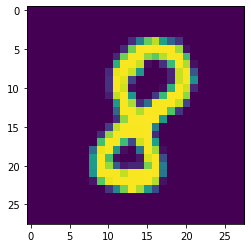

In [165]:
plt.imshow(fours[100].reshape(28, 28))

In [29]:
a = np.array([100, 100])

In [32]:
1 / (1 + np.exp(-a))

array([1., 1.])

In [33]:
np.exp(a) / np.sum(np.exp(a))

array([0.5, 0.5])